In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data_science_job.csv")

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [9]:
cols


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [11]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

overlaping of the figures says that data missing at random so the distribution is same of df and newdf

<Axes: >

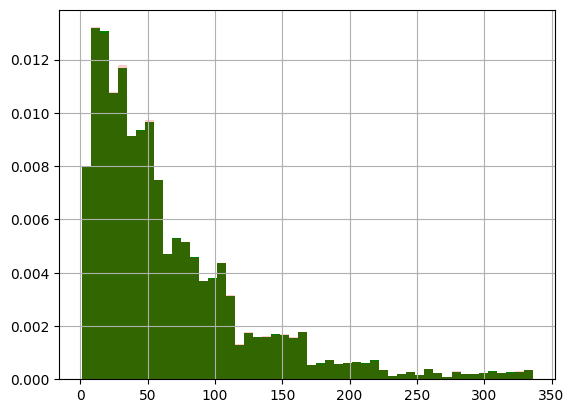

In [13]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['training_hours'].hist(bins=50, ax=ax, density=True, color='green')
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.2)


<Axes: ylabel='Density'>

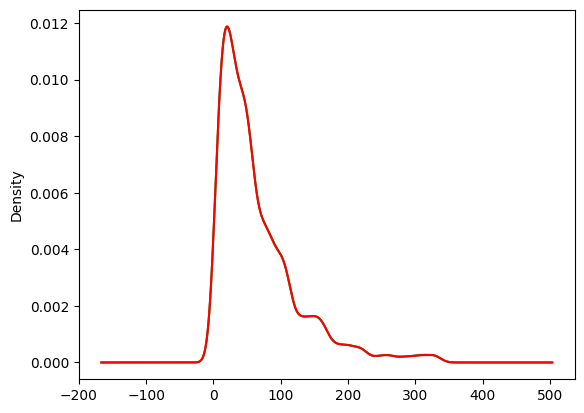

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['training_hours'].plot.density(color='green')
new_df['training_hours'].plot.density(color='red')


<Axes: >

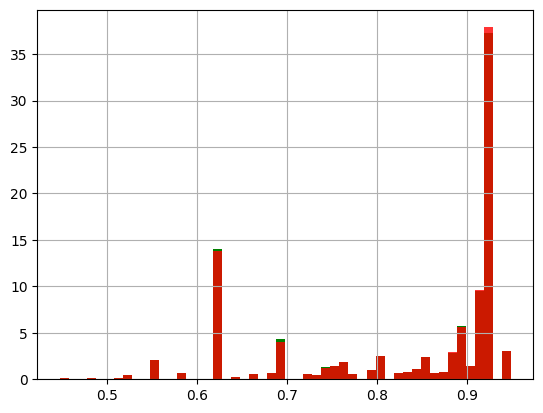

In [15]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['city_development_index'].hist(bins=50, ax=ax, density=True, color='green')
new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.8)


<Axes: ylabel='Density'>

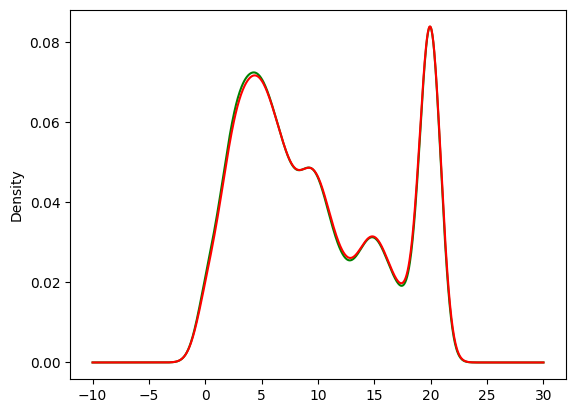

In [16]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['experience'].plot.density(color='green')
new_df['experience'].plot.density(color='red')


In [18]:
new_df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

the numerical columns('city_development_index','experience', 'training_hours') are MCAR so CCA is valid because data distribution is same 

But for categorical ('enrolled_university', 'education_level',) ratio should maintain of categories in the data before and after

In [19]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [20]:
df['education_level'].value_counts()


education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [21]:
temp=pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
], axis = 1)

temp.columns=['original', 'CCA']

temp

,original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [24]:
temp=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis = 1)

temp.columns=['original', 'CCA']

temp

,original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
